# Peter ve Kurt: Pekiştirmeli Öğrenme Giriş

Bu eğitimde, bir yol bulma problemine Pekiştirmeli Öğrenme uygulamayı öğreneceğiz. Ayar, Rus besteci [Sergei Prokofiev](https://en.wikipedia.org/wiki/Sergei_Prokofiev) tarafından yazılan [Peter ve Kurt](https://en.wikipedia.org/wiki/Peter_and_the_Wolf) adlı müzikal masaldan esinlenmiştir. Bu, genç öncü Peter'in cesurca evinden çıkıp kurtu kovalamak için orman açıklığına gittiği bir hikayedir. Peter'in çevresini keşfetmesine ve en uygun navigasyon haritasını oluşturmasına yardımcı olacak makine öğrenme algoritmalarını eğiteceğiz.

Öncelikle, bir dizi faydalı kütüphaneyi içe aktaralım:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Pekiştirmeli Öğrenmeye Genel Bakış

**Pekiştirmeli Öğrenme** (RL), bir **ajanın** belirli bir **ortamda** en iyi davranışını öğrenmesini sağlayan ve birçok deney yaparak gerçekleştirilen bir öğrenme tekniğidir. Bu ortamda bir ajanın, bir **ödül fonksiyonu** ile tanımlanan bir **hedefi** olmalıdır.

## Ortam

Basitlik açısından, Peter'ın dünyasını `genişlik` x `yükseklik` boyutlarında bir kare tahta olarak düşünelim. Bu tahtadaki her bir hücre şu şekilde olabilir:
* Peter ve diğer canlıların yürüyebileceği **zemin**
* Üzerinde yürüyemeyeceğiniz **su**
* Dinlenebileceğiniz bir yer olan **ağaç** veya **çimen**
* Peter'ın kendini beslemek için bulmaktan memnun olacağı bir şey olan **elma**
* Tehlikeli olan ve kaçınılması gereken bir **kurt**

Ortamla çalışmak için `Board` adında bir sınıf tanımlayacağız. Bu defteri çok fazla karmaşık hale getirmemek adına, tahtayla çalışmak için gereken tüm kodu ayrı bir `rlboard` modülüne taşıdık ve şimdi bu modülü içe aktaracağız. Uygulamanın iç detaylarını öğrenmek için bu modülün içine bakabilirsiniz.


Şimdi rastgele bir tahta oluşturalım ve nasıl göründüğüne bakalım:


In [4]:
# code block 1

## Eylemler ve Politika

Örneğimizde, Peter'ın amacı bir elma bulmak, aynı zamanda kurt ve diğer engellerden kaçınmaktır. Bu eylemleri bir sözlük olarak tanımlayın ve bunları ilgili koordinat değişiklikleriyle eşleştirin.


In [5]:
# code block 2

Ajanımızın (Peter) stratejisi, **politika** olarak adlandırılan bir şeyle tanımlanır. Şimdi, **rastgele yürüyüş** adı verilen en basit politikayı ele alalım.

## Rastgele yürüyüş

Öncelikle, rastgele yürüyüş stratejisini uygulayarak problemimizi çözelim.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## Ödül Fonksiyonu

Politikamızı daha akıllı hale getirmek için, hangi hamlelerin diğerlerinden "daha iyi" olduğunu anlamamız gerekiyor.


In [8]:
#code block 5

## Q-Öğrenme

Bir Q-Tablosu veya çok boyutlu bir dizi oluşturun. Tahtamızın boyutları `genişlik` x `yükseklik` olduğundan, Q-Tablosunu `genişlik` x `yükseklik` x `len(actions)` şeklinde bir numpy dizisi ile temsil edebiliriz:


In [9]:
# code block 6

Q-Tablosunu tahtada görselleştirmek için `plot` fonksiyonuna aktarın:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Q-Öğrenmenin Özeti: Bellman Denklemi ve Öğrenme Algoritması

Öğrenme algoritmamız için bir sözde kod yazın:

* Tüm durumlar ve eylemler için Q-Tablosu Q'yu eşit sayılarla başlatın
* Öğrenme oranını $\alpha\leftarrow 1$ olarak ayarlayın
* Simülasyonu birçok kez tekrarlayın
   1. Rastgele bir pozisyonda başlayın
   1. Tekrarla
        1. Durum $s$'de bir eylem $a$ seçin
        2. Yeni bir duruma $s'$ geçerek eylemi gerçekleştirin
        3. Eğer oyun sonu koşuluyla karşılaşırsak veya toplam ödül çok küçükse - simülasyondan çıkın  
        4. Yeni durumda ödül $r$'yi hesaplayın
        5. Bellman denklemine göre Q-Fonksiyonunu güncelleyin: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$ yapın
        7. Toplam ödülü güncelleyin ve $\alpha$'yı azaltın.

## Keşfet vs. Sömür

En iyi yaklaşım, keşfetme ve sömürme arasında bir denge kurmaktır. Çevremiz hakkında daha fazla bilgi edindikçe, optimal yolu izleme olasılığımız artar, ancak ara sıra keşfedilmemiş bir yolu seçmek faydalı olabilir.

## Python Uygulaması

Artık öğrenme algoritmasını uygulamaya hazırız. Bundan önce, Q-Tablosundaki rastgele sayıları ilgili eylemler için bir olasılık vektörüne dönüştürecek bir fonksiyona da ihtiyacımız var:


In [10]:
# code block 7

Orijinal vektöre, tüm bileşenlerin aynı olduğu başlangıç durumunda sıfıra bölünmeyi önlemek için küçük bir miktar `eps` ekliyoruz.

Gerçek öğrenme algoritmasını, **epoklar** olarak da adlandırılan 5000 deney için çalıştıracağız:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

Bu algoritmayı çalıştırdıktan sonra, Q-Tablosu her adımda farklı eylemlerin çekiciliğini tanımlayan değerlerle güncellenmelidir. Tabloyu burada görselleştirin:


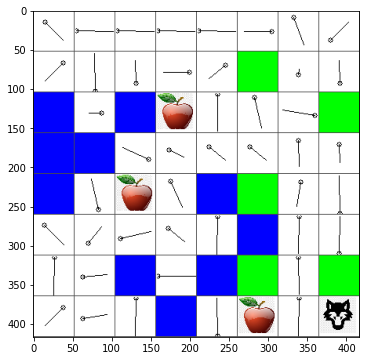

In [43]:
m.plot(Q)

## Politikayı Kontrol Etme

Q-Tablosu, her durumdaki her bir eylemin "çekiciliğini" listelediği için, dünyamızda verimli bir gezinmeyi tanımlamak için onu kullanmak oldukça kolaydır. En basit durumda, sadece en yüksek Q-Tablosu değerine karşılık gelen eylemi seçebiliriz:


In [13]:
# code block 9

2

Eğer yukarıdaki kodu birkaç kez denerseniz, bazen sadece "takıldığını" fark edebilirsiniz ve bunu durdurmak için not defterinde DURDUR düğmesine basmanız gerekir.

> **Görev 1:** `walk` fonksiyonunu, yolun maksimum uzunluğunu belirli bir adım sayısıyla (örneğin, 100) sınırlayacak şekilde değiştirin ve yukarıdaki kodun bu değeri zaman zaman döndürdüğünü gözlemleyin.

> **Görev 2:** `walk` fonksiyonunu, daha önce bulunduğu yerlere geri dönmemesini sağlayacak şekilde değiştirin. Bu, `walk` fonksiyonunun döngüye girmesini engelleyecektir, ancak ajan yine de kaçamayacağı bir konumda "sıkışabilir".


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


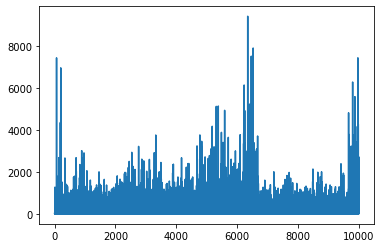

In [57]:
plt.plot(lpath)

## Alıştırma
## Daha gerçekçi bir Peter ve Kurt dünyası



---

**Feragatname**:  
Bu belge, [Co-op Translator](https://github.com/Azure/co-op-translator) adlı yapay zeka çeviri hizmeti kullanılarak çevrilmiştir. Doğruluk için çaba göstersek de, otomatik çevirilerin hata veya yanlışlıklar içerebileceğini lütfen unutmayın. Belgenin orijinal dili, yetkili kaynak olarak kabul edilmelidir. Kritik bilgiler için profesyonel insan çevirisi önerilir. Bu çevirinin kullanımından kaynaklanan herhangi bir yanlış anlama veya yanlış yorumlama durumunda sorumluluk kabul edilmez.
